In [1]:
#Basic Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import plotly.graph_objects as go
from matplotlib.pyplot import figure

In [83]:
#importing database of stock data
googl_data = pd.read_csv('C:/Users/Jonat/Desktop/Springboard/Data/Data/Data/GOOGL/GOOGL.csv',parse_dates=['Date'],index_col='Date')

In [84]:
#checking data
googl_data.info(),googl_data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4020 entries, 2004-08-19 to 2020-08-06
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       4020 non-null   float64
 1   High       4020 non-null   float64
 2   Low        4020 non-null   float64
 3   Close      4020 non-null   float64
 4   Adj Close  4020 non-null   float64
 5   Volume     4020 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 219.8 KB


(None,
 Open         0
 High         0
 Low          0
 Close        0
 Adj Close    0
 Volume       0
 dtype: int64)

In [85]:
#renaming
df = googl_data

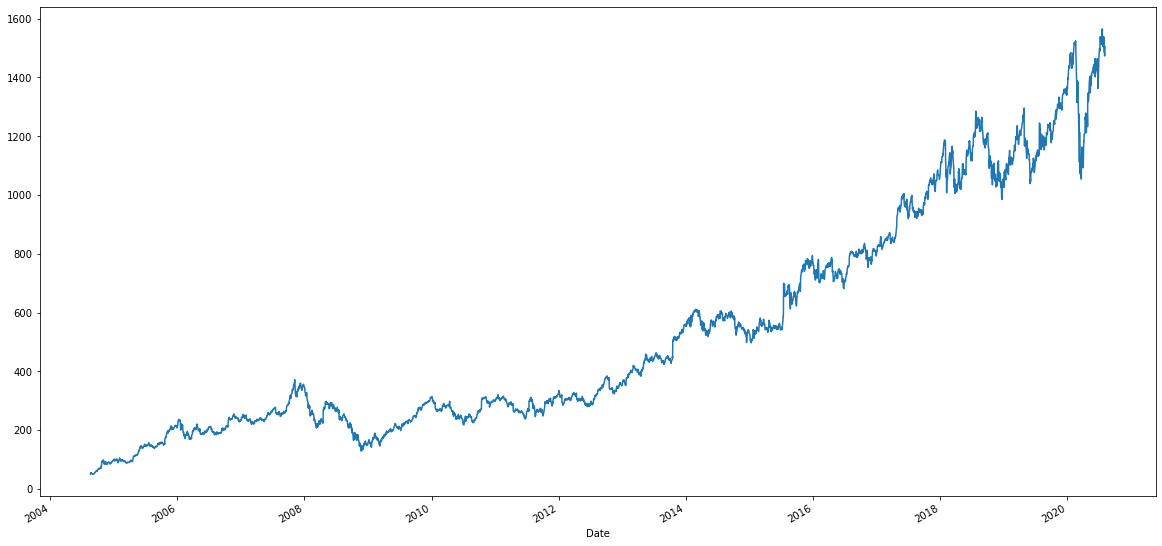

In [86]:
#Plot of data 
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
df['Adj Close'].plot(ax=ax)

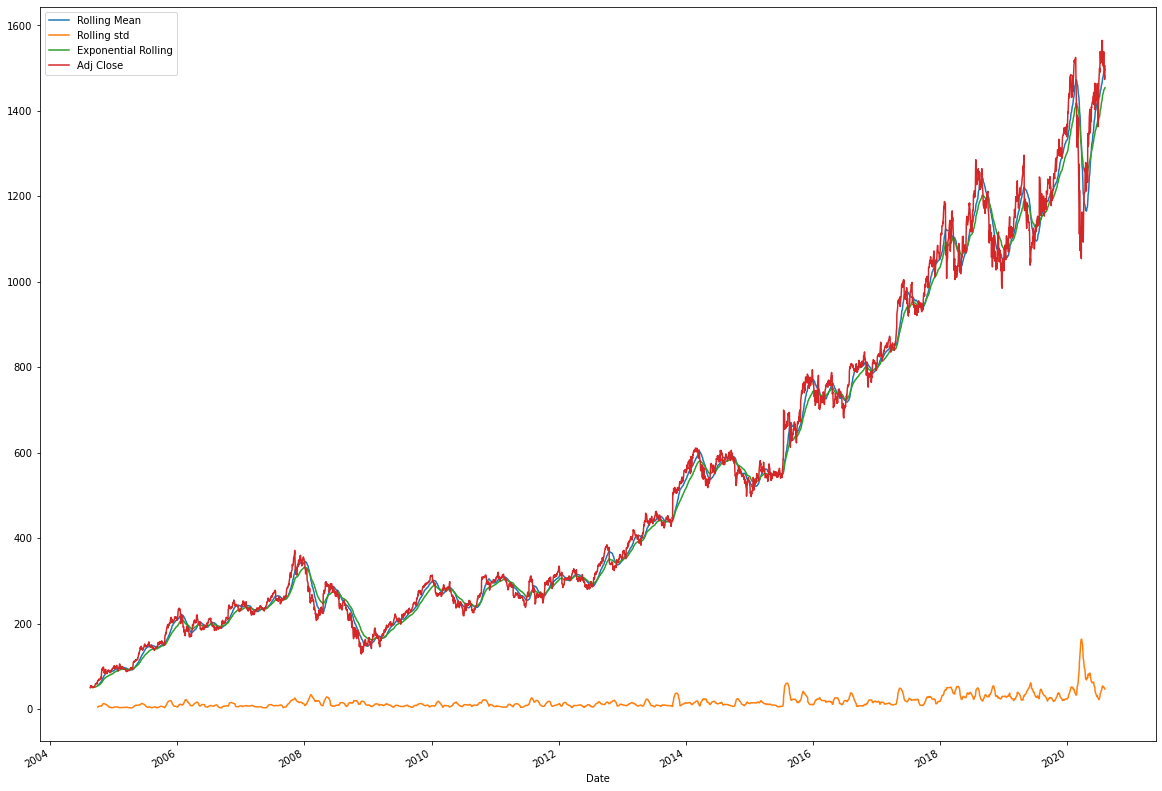

In [87]:
#Rolling data,std,mean and exponential rolling mean of data over a 30day period 
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)
df['Adj Close'].rolling(30).mean().plot(ax=ax,label='Rolling Mean')
df['Adj Close'].rolling(30).std().plot(ax=ax,label='Rolling std')
df['Adj Close'].ewm(30,adjust=False).mean().plot(ax=ax,label='Exponential Rolling')
df['Adj Close'].plot(ax=ax,label='Adj Close')
plt.legend()

In [88]:
#Creating functions of indicators to add to data frame to check which ones are best for predicting future stock price

In [89]:
#normalizing
df['Open'] = df['Open']/df['Open'].iloc[0]-1
df['High'] = df['High']/df['High'].iloc[0]-1
df['Low'] = df['Low']/df['Low'].iloc[0]-1
df['Close'] = df['Close']/df['Close'].iloc[0]-1
df['Adj Close'] = df['Adj Close']/df['Adj Close'].iloc[0]-1
df['Volume'] = df['Volume']/df['Volume'].iloc[0]-1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F40D6C6820>,
      dtype=object)

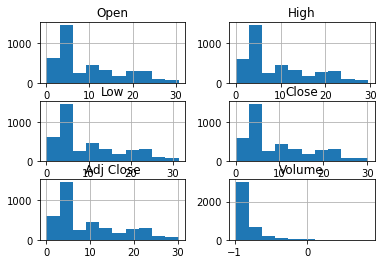

In [90]:
df.hist()

In [91]:
from ta.momentum import RSIIndicator,AwesomeOscillatorIndicator,KAMAIndicator,PercentagePriceOscillator,PercentageVolumeOscillator
from ta.momentum import ROCIndicator,StochRSIIndicator,StochasticOscillator,TSIIndicator,UltimateOscillator
from ta.momentum import WilliamsRIndicator

In [92]:
rsi_indicator = RSIIndicator(close=df['Adj Close'])
awesome_oscillator_indicator = AwesomeOscillatorIndicator(high=df['High'],low=df['Low'])
kama_indicator = KAMAIndicator(close=df['Adj Close'])
percentage_price_oscillator_indicator = PercentagePriceOscillator(close=df['Adj Close'])
percentage_volume_oscillator_indicator = PercentageVolumeOscillator(volume=df['Volume'])
roc_indicator = ROCIndicator(close=df['Adj Close'])
stoch_rsi_indicator = StochRSIIndicator(close=df['Adj Close'])
stoch_rsi_oscillator_indicator = StochasticOscillator(high=df['High'],low=df['Low'],close=df['Adj Close'])
tsi_indicator = TSIIndicator(close=df['Adj Close'])
ultimate_oscillator_indicator = UltimateOscillator(high=df['High'],low=df['Low'],close=df['Adj Close'])
williams_r_indicator = WilliamsRIndicator(high=df['High'],low=df['Low'],close=df['Adj Close'])

In [93]:
df['RSI'] = rsi_indicator.rsi()
df['Awesome Oscillator'] = awesome_oscillator_indicator.awesome_oscillator()
df['KAMA'] = kama_indicator.kama()
df['PPO'] = percentage_price_oscillator_indicator.ppo()
df['PVO'] = percentage_volume_oscillator_indicator.pvo()
df['ROC'] = roc_indicator.roc()
df['Stoch RSI In'] = stoch_rsi_indicator.stochrsi()
df['Stoch RSI OS'] = stoch_rsi_oscillator_indicator.stoch()
df['TSI'] = tsi_indicator.tsi()
df['Ult Osc'] = ultimate_oscillator_indicator.ultimate_oscillator()
df['Williams R'] = williams_r_indicator.williams_r() 

In [94]:
from ta.trend import MACD, ADXIndicator, AroonIndicator,CCIIndicator,DPOIndicator
from ta.trend import EMAIndicator,IchimokuIndicator,KSTIndicator,MassIndex,PSARIndicator
from ta.trend import STCIndicator,TRIXIndicator,VortexIndicator,WMAIndicator

In [95]:
macd_indicator = MACD(df['Adj Close'])
adx_indicator = ADXIndicator(high=df['High'],low=df['Low'],close=df['Adj Close'])
aroon_indicator = AroonIndicator(close=df['Adj Close'])
cci_indicator = CCIIndicator(high=df['High'],low=df['Low'],close=df['Adj Close'])
dpo_indicator = DPOIndicator(close=df['Adj Close'])
ema_indicator = EMAIndicator(close=df['Adj Close'])
ichimoku_indicator = IchimokuIndicator(high=df['High'],low=df['Low'])
kst_indicator = KSTIndicator(close=df['Adj Close'])
mass_indicator = MassIndex(high=df['High'],low=df['Low'])
psar_indicator = PSARIndicator(high=df['High'],low=df['Low'],close=df['Adj Close'])
stc_indicator = STCIndicator(close=df['Adj Close'])
trix_indicator = TRIXIndicator(close=df['Adj Close'])
vortex_indicator = VortexIndicator(high=df['High'],low=df['Low'],close=df['Adj Close'])
wma_indicator = WMAIndicator(close=df['Adj Close'])

In [96]:
df['MACD'] = macd_indicator.macd()
df['ADX'] = adx_indicator.adx()
df['Aroon'] = aroon_indicator.aroon_indicator()
df['CCI'] = cci_indicator.cci()
df['DPO'] = dpo_indicator.dpo()
df['EMA'] = ema_indicator.ema_indicator()
df['Ichimoku Base'] = ichimoku_indicator.ichimoku_base_line() 
df['Ichimoku CL'] = ichimoku_indicator.ichimoku_conversion_line()
df['KST'] = kst_indicator.kst()
df['MASS'] = mass_indicator.mass_index() 
df['PSAR'] = psar_indicator.psar()
df['STC'] = stc_indicator.stc()
df['TRIX'] = trix_indicator.trix() 
df['VI'] = vortex_indicator.vortex_indicator_diff()
df['WMA'] = wma_indicator.wma()

C:\Users\Jonat\anaconda3\lib\site-packages\ta\trend.py:768: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i] / self._trs[i])
C:\Users\Jonat\anaconda3\lib\site-packages\ta\trend.py:772: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i] / self._trs[i])


In [97]:
from ta.volatility import BollingerBands,AverageTrueRange,DonchianChannel,KeltnerChannel,UlcerIndex

In [98]:
bollinger_band_indicator = BollingerBands(close=df['Adj Close'])
average_true_range_indicator = AverageTrueRange(high=df['High'],low=df['Low'],close=df['Adj Close'])
donchain_channel_indicator = DonchianChannel(high=df['High'],low=df['Low'],close=df['Adj Close'])
keltner_channel_indicator = KeltnerChannel(high=df['High'],low=df['Low'],close=df['Adj Close'])
ulcer_indicator = UlcerIndex(close=df['Adj Close'])

In [99]:
df['Bollinger Avg'] = bollinger_band_indicator.bollinger_mavg()
df['Bollinger High'] = bollinger_band_indicator.bollinger_hband()
df['Bollinger Low'] = bollinger_band_indicator.bollinger_lband()
df['ATR'] = average_true_range_indicator.average_true_range()
df['Donchain Mid'] = donchain_channel_indicator.donchian_channel_mband()
df['Donchain High'] = donchain_channel_indicator.donchian_channel_hband()
df['Donchain Low'] = donchain_channel_indicator.donchian_channel_lband()
df['Keltner Mid'] = keltner_channel_indicator.keltner_channel_mband()
df['Keltner High'] = keltner_channel_indicator.keltner_channel_hband()
df['Keltner Low'] = keltner_channel_indicator.keltner_channel_lband()
df['Ulcer'] = ulcer_indicator.ulcer_index()

In [100]:
from ta.volume import OnBalanceVolumeIndicator,AccDistIndexIndicator,ChaikinMoneyFlowIndicator,EaseOfMovementIndicator,ForceIndexIndicator
from ta.volume import MFIIndicator,NegativeVolumeIndexIndicator,VolumePriceTrendIndicator,VolumeWeightedAveragePrice

In [101]:
on_balance_volume_indicator = OnBalanceVolumeIndicator(close=df['Adj Close'],volume=df['Volume'])
acc_dist_indicator_indicator = AccDistIndexIndicator(high=df['High'],low=df['Low'],close=df['Adj Close'],volume=df['Volume'])
chaikin_money_flow_indicator = ChaikinMoneyFlowIndicator(high=df['High'],low=df['Low'],close=df['Adj Close'],volume=df['Volume'])
ease_movement_indicator = EaseOfMovementIndicator(high=df['High'],low=df['Low'],volume=df['Volume'])
rorce_index_indicator = ForceIndexIndicator(close=df['Adj Close'],volume=df['Volume'])
mfi_indicator = MFIIndicator(high=df['High'],low=df['Low'],close=df['Adj Close'],volume=df['Volume'])
nvi_indicator = NegativeVolumeIndexIndicator(close=df['Adj Close'],volume=df['Volume'])
vpt_indicator = VolumePriceTrendIndicator(close=df['Adj Close'],volume=df['Volume'])
vwap_indicator = VolumeWeightedAveragePrice(high=df['High'],low=df['Low'],close=df['Adj Close'],volume=df['Volume'])

In [102]:
df['OBV'] = on_balance_volume_indicator.on_balance_volume() 
df['ADI'] = acc_dist_indicator_indicator.acc_dist_index()
df['CMF'] = chaikin_money_flow_indicator.chaikin_money_flow()
df['EoM'] = ease_movement_indicator.ease_of_movement()
df['FI'] = rorce_index_indicator.force_index()
df['MFI'] = mfi_indicator.money_flow_index()
#df['NVI'] = nvi_indicator.negative_volume_index()
df['VPT'] = vpt_indicator.volume_price_trend()
df['VWAP'] = vwap_indicator.volume_weighted_average_price()

In [103]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume,RSI,Awesome Oscillator,KAMA,PPO,...,Keltner Low,Ulcer,OBV,ADI,CMF,EoM,FI,MFI,VPT,VWAP
Date,,,,,,,,,,,,,,,,,,,,,
2020-07-31,28.911061,27.897079,29.273990,28.628504,28.628504,-0.897526,48.055098,0.574722,29.029718,1.173660,...,31.054393,2.548821,-158.598000,-510.978383,0.101743,-1.185819e+08,0.081818,49.465944,0.020730,29.409583
2020-08-03,28.790181,27.757107,29.642940,28.525160,28.525160,-0.949079,47.182079,0.367277,28.985481,0.896967,...,31.049339,2.913501,-157.648922,-511.154390,0.110295,2.274919e+07,0.084142,42.492303,0.033835,29.373613
2020-08-04,28.704466,27.668401,29.482827,28.336791,28.336791,-0.958338,45.557447,0.207254,28.927570,0.617865,...,31.026246,3.307609,-156.690584,-511.406672,0.098914,-2.355458e+07,0.097910,49.526384,0.009755,29.316588
2020-08-05,28.506863,27.608688,29.632530,28.452081,28.452081,-0.967364,46.765644,0.038967,28.881480,0.423538,...,31.002400,3.611540,-157.657948,-511.567779,0.102250,9.413487e+06,0.067990,42.428381,0.002393,29.279068
2020-08-06,28.493478,27.921080,29.646689,28.967013,28.967013,-0.962731,51.899988,-0.104986,28.882379,0.408524,...,30.979604,3.741941,-158.620679,-511.363441,0.091000,2.926572e+07,-0.012543,42.463443,-0.021360,29.252514


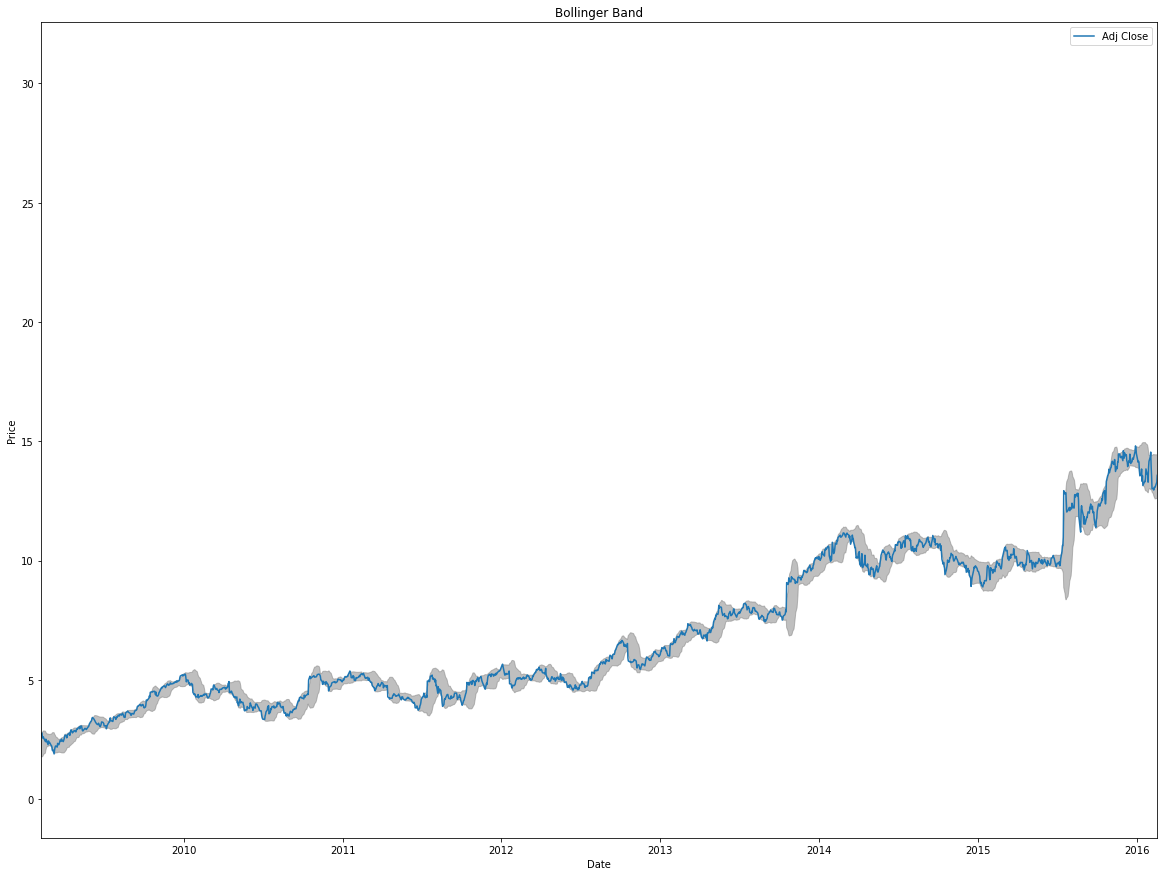

In [104]:
#plotting 
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)
x_axis = df.index
plt.fill_between(x_axis,df['Bollinger High'],df['Bollinger Low'],color='grey',alpha=.5)
ax.plot(x_axis,df['Adj Close'],label='Adj Close')
ax.set_title('Bollinger Band')
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.xaxis.zoom(3)
ax.legend()

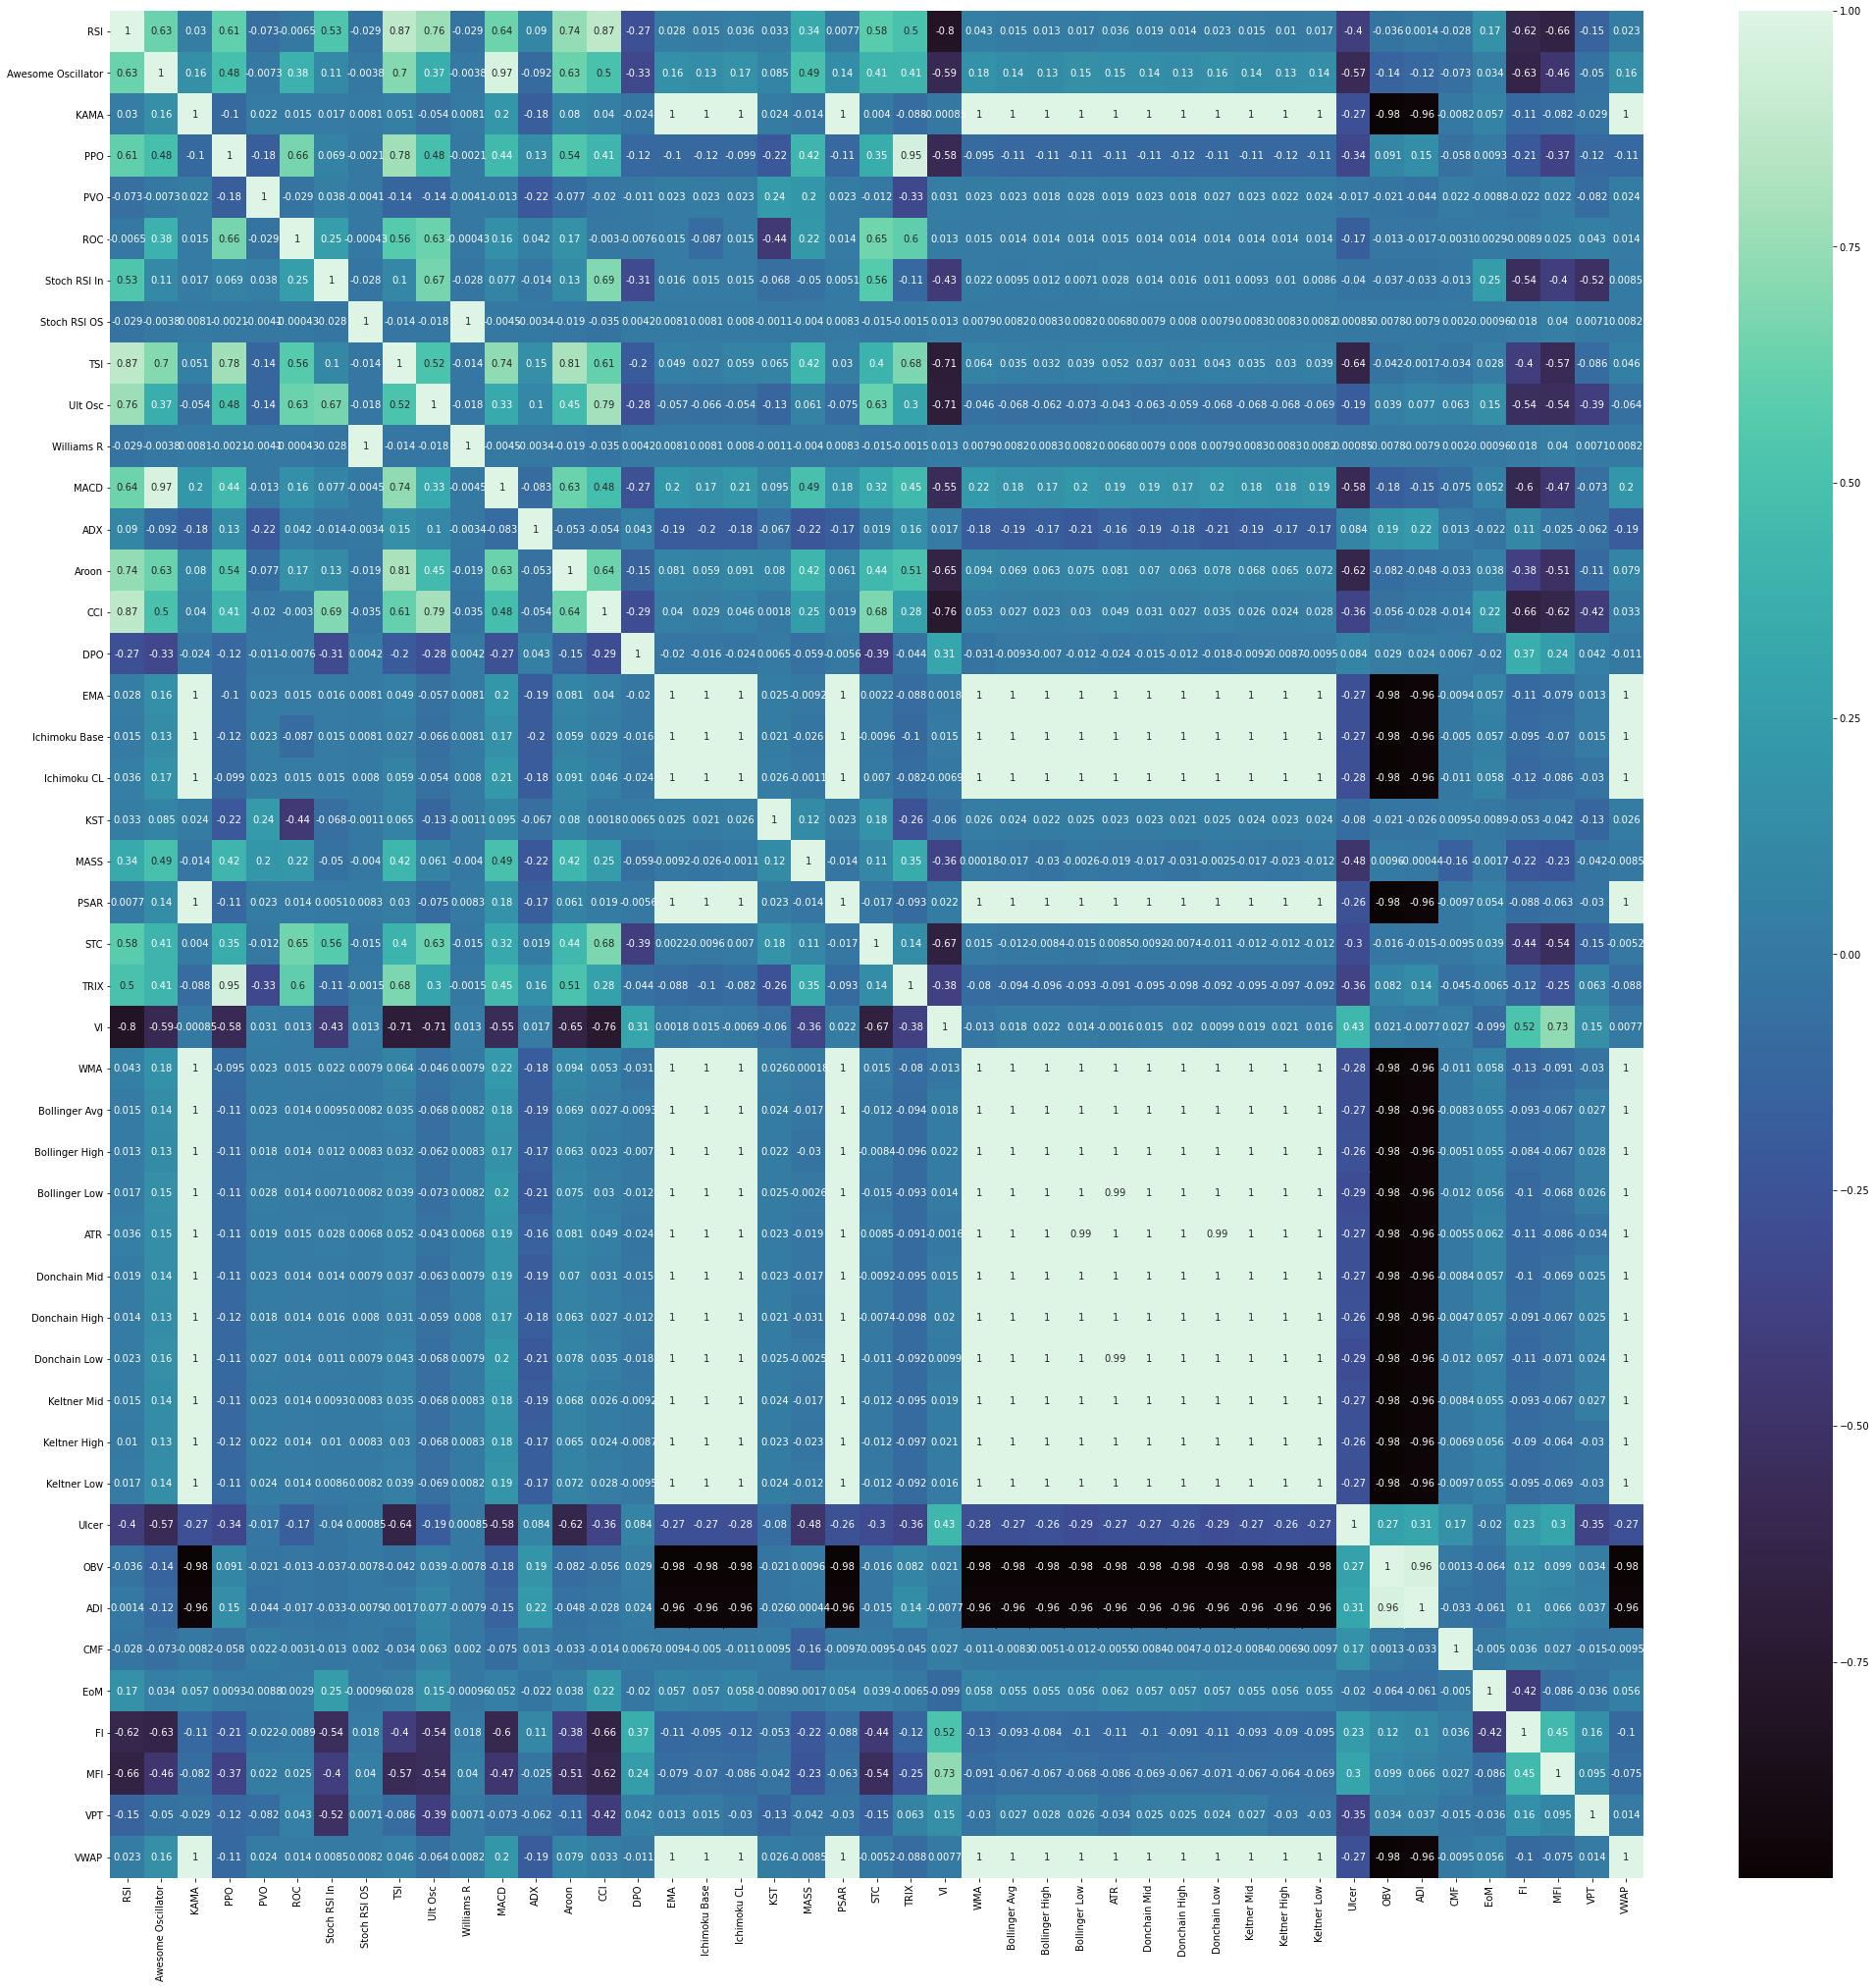

In [105]:

fig, ax = plt.subplots(figsize=(35,35))
sns.heatmap(df.drop(columns=['Open','Close','High','Low','Adj Close','Volume']).corr(),annot=True,cmap='mako')

In [106]:
#We will be predicting the next day price. We are shifting the data by 1 day
df['Adj Close Shift'] = df['Adj Close'].shift(-1)
df.dropna(inplace=True)

In [107]:
#Checking data before we split it into training and testing 
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3948 entries, 2004-11-30 to 2020-08-05
Data columns (total 52 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Open                3948 non-null   float64
 1   High                3948 non-null   float64
 2   Low                 3948 non-null   float64
 3   Close               3948 non-null   float64
 4   Adj Close           3948 non-null   float64
 5   Volume              3948 non-null   float64
 6   RSI                 3948 non-null   float64
 7   Awesome Oscillator  3948 non-null   float64
 8   KAMA                3948 non-null   float64
 9   PPO                 3948 non-null   float64
 10  PVO                 3948 non-null   float64
 11  ROC                 3948 non-null   float64
 12  Stoch RSI In        3948 non-null   float64
 13  Stoch RSI OS        3948 non-null   float64
 14  TSI                 3948 non-null   float64
 15  Ult Osc             3948 non-null   f

,Open,High,Low,Close,Adj Close,Volume,RSI,Awesome Oscillator,KAMA,PPO,...,Ulcer,OBV,ADI,CMF,EoM,FI,MFI,VPT,VWAP,Adj Close Shift
Date,,,,,,,,,,,,,,,,,,,,,
2004-11-30,0.8071,0.758601,0.878387,0.813634,0.813634,-0.655510,59.376760,0.042434,0.784841,6.046950,...,20.190168,-11.962288,-49.817761,1.093280,265281.248044,-0.007233,32.974943,-0.018531,0.749826,0.793502
2004-12-01,0.8195,0.753796,0.871092,0.793502,0.793502,-0.648169,57.383357,0.055695,0.785235,6.008174,...,18.658772,-11.314118,-50.027104,1.071035,-109481.022346,-0.004335,35.389875,0.008484,0.761480,0.787921
2004-12-02,0.7990,0.744282,0.860671,0.787921,0.787921,-0.719895,56.813906,0.054463,0.785343,5.844640,...,18.383068,-10.594223,-50.207165,0.958414,-161147.110625,-0.003142,44.977180,0.021101,0.764710,0.797887
2004-12-03,0.7995,0.739958,0.850771,0.797887,0.797887,-0.737419,57.622635,0.047340,0.786927,5.749704,...,18.016088,-11.331642,-50.173588,0.885322,-106877.228776,-0.003743,52.993616,-0.004264,0.765764,0.756926
2004-12-06,0.7913,0.736498,0.834306,0.756926,0.756926,-0.720204,53.212079,0.033839,0.785627,5.180134,...,17.841905,-10.611438,-50.592947,0.533645,-135294.513831,0.001006,61.764353,0.027645,0.761983,0.708491


In [108]:
#Spliting the dta into training and testing
#X_train = df.drop(columns=['Adj Close Shift','Adj Close','Open','High','Low','Close','Volume']).loc['2004-09-24':'2015-11-06']
#X_test = df.drop(columns=['Adj Close Shift','Adj Close','Open','High','Low','Close','Volume']).loc['2015-11-07':'2020-08-05']
#y_train = df['Adj Close Shift'].loc['2004-09-24':'2015-11-06']
#y_test = df['Adj Close Shift'].loc['2015-11-07':'2020-08-05']

In [109]:
#importing another stock to check for corr and to predict on
aapl_data = pd.read_csv('C:/Users/Jonat/Desktop/Springboard/Data/Data/Data/AAPL/AAPL.csv',parse_dates=['Date'],index_col='Date')
aapl_data['Adj Close'].corr(df['Adj Close'])

0.9578537353766367

In [110]:
#Spliting the dta into training and testing
X = df.drop(columns=['Adj Close Shift','Adj Close','Open','High','Low','Close','Volume'])
y = df['Adj Close Shift']
X_train = X[:int(X.shape[0]*0.7)]
X_test = X[int(X.shape[0]*0.7):]
y_train = y[:int(X.shape[0]*0.7)]
y_test = y[int(X.shape[0]*0.7):]

In [111]:
X_train_columns= X_train.columns
X_train_columns

Index(['RSI', 'Awesome Oscillator', 'KAMA', 'PPO', 'PVO', 'ROC',
       'Stoch RSI In', 'Stoch RSI OS', 'TSI', 'Ult Osc', 'Williams R', 'MACD',
       'ADX', 'Aroon', 'CCI', 'DPO', 'EMA', 'Ichimoku Base', 'Ichimoku CL',
       'KST', 'MASS', 'PSAR', 'STC', 'TRIX', 'VI', 'WMA', 'Bollinger Avg',
       'Bollinger High', 'Bollinger Low', 'ATR', 'Donchain Mid',
       'Donchain High', 'Donchain Low', 'Keltner Mid', 'Keltner High',
       'Keltner Low', 'Ulcer', 'OBV', 'ADI', 'CMF', 'EoM', 'FI', 'MFI', 'VPT',
       'VWAP'],
      dtype='object')

In [112]:

#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler().fit(X_train)
#X_train = scaler.transform(X_train)
#X_test = scaler.transform(X_test)

LM Train R-Squared: 0.9982570872790408
LM Test R-Squared: 0.9925904446170213
LM Predict R-Squared: 0.9925904446170213
LM Mean Absolute Error: 0.24159061287247166


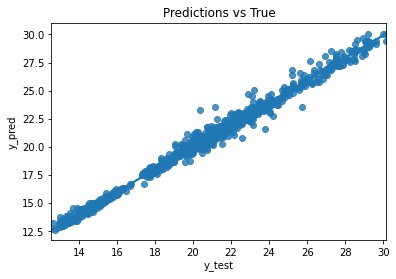

In [113]:
#OLS Linear Model
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_absolute_error
rModel = linear_model.LinearRegression()
rModel.fit(X_train,y_train)
y_pred = rModel.predict(X_test)
#R-Squared coefficent
train_score = rModel.score(X_train,y_train)
test_score = rModel.score(X_test,y_test)
lm_r2score = r2_score(y_test,y_pred)
print('LM Train R-Squared:',train_score)
print('LM Test R-Squared:',test_score)
print('LM Predict R-Squared:',lm_r2score)
#check to see how prediction repersnt true results
#plt.scatter(y_test,y_pred)
sns.regplot(x=y_test,y=y_pred)
plt.title('Predictions vs True')
plt.xlabel('y_test')
plt.ylabel('y_pred')
lm_mean_abs_error = mean_absolute_error(y_test,y_pred)
print('LM Mean Absolute Error:',lm_mean_abs_error)

C:\Users\Jonat\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.56427e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Ridge Train R-Squared: 0.9981340396766489
Ridge Test R-Squared: 0.9908202443772968
Ridge Predict R-Squared: 0.9908202443772968
Ridge Mean Absolute Error: 0.27789828460510047


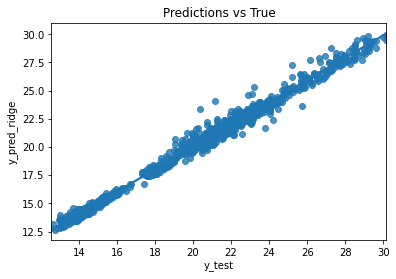

In [114]:
#Ridge Model
ridge_model = linear_model.Ridge()
ridge_model.fit(X_train,y_train)
y_pred_ridge = ridge_model.predict(X_test)
#R-Squared coefficent
ridge_train_score = ridge_model.score(X_train,y_train)
ridge_test_score = ridge_model.score(X_test,y_test)
ridge_pred_score = r2_score(y_test,y_pred_ridge)
print('Ridge Train R-Squared:',ridge_train_score)
print('Ridge Test R-Squared:',ridge_test_score )
print('Ridge Predict R-Squared:',ridge_pred_score)
sns.regplot(x=y_test,y=y_pred_ridge)
plt.title('Predictions vs True')
plt.xlabel('y_test')
plt.ylabel('y_pred_ridge')
ridge_mean_abs_error = mean_absolute_error(y_test,y_pred_ridge)
print('Ridge Mean Absolute Error:',ridge_mean_abs_error)


In [115]:
X = df.drop(columns=['Adj Close Shift','Adj Close','Open','High','Low','Close','Volume'])
y = df['Adj Close Shift']
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit()

alpha_point_1 = []
alpha_1 = []
alpha_10 = [] 

for train_index, test_index in tscv.split(X): 
    X_tr, X_ts = X.iloc[train_index], X.iloc[test_index]
    y_tr, y_ts = y.iloc[train_index], y.iloc[test_index]
    

    for alpha in [0.1, 1.0, 10.0]:
        print('Alpha is:',alpha)
        ridge_model = linear_model.Ridge(alpha)
        ridge_model.fit(X_tr,y_tr)
        y_pred_ridge = ridge_model.predict(X_ts)
        ridge_train_score = ridge_model.score(X_tr,y_tr)
        ridge_test_score = ridge_model.score(X_ts,y_ts)
        print('Ridge Train R-Squared:',ridge_train_score)
        print('Ridge Test R-Squared:',ridge_test_score )
        ridge_mean_abs_error = mean_absolute_error(y_ts,y_pred_ridge)
        print('Ridge Mean Absolute Error:',ridge_mean_abs_error)
        


Alpha is: 0.1
Ridge Train R-Squared: 0.9949379500201753
Ridge Test R-Squared: 0.9819295295576046
Ridge Mean Absolute Error: 0.10237315593523459
Alpha is: 1.0
Ridge Train R-Squared: 0.994644874486718
Ridge Test R-Squared: 0.9748650998243741
Ridge Mean Absolute Error: 0.11357424401273222
Alpha is: 10.0
Ridge Train R-Squared: 0.9939037778833647
Ridge Test R-Squared: 0.9788922111640634
Ridge Mean Absolute Error: 0.11579474247224514
Alpha is: 0.1
Ridge Train R-Squared: 0.9935187643390433
Ridge Test R-Squared: 0.9688299519086249
Ridge Mean Absolute Error: 0.07350356194732761
Alpha is: 1.0
Ridge Train R-Squared: 0.993305378871021
Ridge Test R-Squared: 0.9647987891694004
Ridge Mean Absolute Error: 0.07928871785587456
Alpha is: 10.0
Ridge Train R-Squared: 0.9926940922049919
Ridge Test R-Squared: 0.9570560577803513
Ridge Mean Absolute Error: 0.08933749520733371
Alpha is: 0.1
Ridge Train R-Squared: 0.9938484280102321
Ridge Test R-Squared: 0.990369325438084
Ridge Mean Absolute Error: 0.11588918874

C:\Users\Jonat\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.98459e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\Jonat\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.50415e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\Jonat\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.24825e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\Jonat\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.82055e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\Jonat\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.1611e-18): result may not be accurate.

In [120]:
#Lasso Model
lasso_model = linear_model.Lasso()
lasso_model.fit(X_train,y_train)
y_pred_lasso = lasso_model.predict(X_test)

lasso_r2score_test = r2_score(y_test,y_pred_lasso)
lasso_r2score_test

-0.3853806607144279

In [121]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
y_pred = rfr.predict(X_test)
r2score = r2_score(y_test,y_pred)
mean_abs_error = mean_absolute_error(y_test,y_pred)
print('R^2:',r2score)
print('Mean Absolute Error:',mean_abs_error)

R^2: -1.9036983760277337
Mean Absolute Error: 6.034612024132639


In [122]:
for i in range(10,20,2):
    df['Adj Close Shift'] = df['Adj Close'].shift(i)
    df.dropna(inplace=True)
    X = df.drop(columns=['Adj Close Shift','Adj Close','Open','High','Low','Close','Volume'])
    y = df['Adj Close Shift']
    X_train = X[:int(X.shape[0]*0.7)]
    X_test = X[int(X.shape[0]*0.7):]
    y_train = y[:int(X.shape[0]*0.7)]
    y_test = y[int(X.shape[0]*0.7):]
    model_result = rfr.fit(X_train,y_train)
    y_pred = model_result.predict(X_test)
    r2score = r2_score(y_test,y_pred)
    mean_abs_error = mean_absolute_error(y_test,y_pred)
    print('R^2:',r2score)
    print('Mean Absolute Error:',mean_abs_error)

R^2: -1.9220590890874671
Mean Absolute Error: 5.970171968800472
R^2: -1.8606084693598683
Mean Absolute Error: 5.842588140155233
R^2: -1.850035638873862
Mean Absolute Error: 5.817107916793393
R^2: -1.9047661920178562
Mean Absolute Error: 5.88141898306092
R^2: -1.707098809030768
Mean Absolute Error: 5.603902484822686


In [ ]:
'''
feature_importance = rfr.feature_importances_

sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0])

plt.barh(pos,feature_importance[sorted_idx])
plt.yticks(pos,X_train_columns[sorted_idx])
'''

In [ ]:
'''
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit()


for train_index, test_index in tscv.split(X): 
    X_tr, X_ts = X.iloc[train_index], X.iloc[test_index]
    y_tr, y_ts = y.iloc[train_index], y.iloc[test_index]
    
    rfr = RandomForestRegressor(n_estimators=100)
    model_result = rfr.fit(X_train,y_train)
    y_pred = model_result.predict(X_test)
    r2score = r2_score(y_test,y_pred)
    mean_abs_error = mean_absolute_error(y_test,y_pred)
    print('R^2:',r2score)
    print('Mean Absolute Error:',mean_abs_error)
'''

